In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)

In [3]:
Path_train = 'adult_train.csv'
adult_data_df = pd.read_csv(Path_train)
adult_data = [adult_data_df]
adult_data_df.head(3)

,Age,Workclass,fnlwgt,Education,Education-num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs-per-week,Native-Country,Earning-potential
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [4]:
Path_test = 'adult_test.csv'
adult_data_df_test = pd.read_csv(Path_test)
adult_data_test = [adult_data_df_test]

# adult_data_df_test.head(10)

In [5]:
adult_data_df.info()
adult_data_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                32561 non-null  int64 
 1   Workclass          32561 non-null  object
 2   fnlwgt             32561 non-null  int64 
 3   Education          32561 non-null  object
 4   Education-num      32561 non-null  int64 
 5   Marital-Status     32561 non-null  object
 6   Occupation         32561 non-null  object
 7   Relationship       32561 non-null  object
 8   Race               32561 non-null  object
 9   Sex                32561 non-null  object
 10  Capital-gain       32561 non-null  int64 
 11  Capital-loss       32561 non-null  int64 
 12  hrs-per-week       32561 non-null  int64 
 13  Native-Country     32561 non-null  object
 14  Earning-potential  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
<class 'pandas.core.frame.DataFrame'>
Rang

In [6]:
# adult_data_df.sample(100)

In [7]:
Ep_map = {'>50K':0 , '<=50K':1}
adult_data_df['Earning-potential'] = adult_data_df['Earning-potential'].map(Ep_map).astype('int64')

# adult_data_df.head(10)

In [8]:
adult_data_df_test['Earning-potential'] = adult_data_df_test['Earning-potential'].map(Ep_map).astype('int64')

# adult_data_df_test.head(10)

In [9]:
Sex_map = {'Female':0 , 'Male':1}
adult_data_df['Sex'] = adult_data_df['Sex'].map(Sex_map).astype('int64')

# adult_data_df.head(10)

In [10]:
adult_data_df_test['Sex'] = adult_data_df_test['Sex'].map(Sex_map).astype('int64')

# adult_data_df_test.head(10)

In [11]:
# adult_data_df.info()

In [12]:
# def plot_correlation(adult_data_df , size = 15):
#     corr = adult_data_df.corr()
#     fig , ax = plt.subplots(figsize=(size , size))
#     ax.matshow(corr)
#     plt.xticks(range(len(corr.columns)) , corr.columns)
#     plt.yticks(range(len(corr.columns)) , corr.columns)
#     plt.show()
# numeric_data = adult_data_df.select_dtypes(include = [np.number])
# plot_correlation(numeric_data)

In [13]:
adult_data_df[['Native-Country' , 'Earning-potential']].groupby(['Native-Country']).mean()

,Earning-potential
Native-Country,
?,0.749571
Cambodia,0.631579
Canada,0.677686
China,0.733333
Columbia,0.966102
Cuba,0.736842
Dominican-Republic,0.971429
Ecuador,0.857143
El-Salvador,0.915094


In [14]:
print(adult_data_df.shape)

adult_data_df['Native-Country'] = adult_data_df['Native-Country'].replace('?' , np.nan)
adult_data_df['Workclass'] = adult_data_df['Workclass'].replace('?' , np.nan)
adult_data_df['Occupation'] = adult_data_df['Occupation'].replace('?' , np.nan)

adult_data_df.dropna(how = 'any' , inplace = True)

print(adult_data_df.shape)

# adult_data_df.head(10)

(32561, 15)
(30162, 15)


In [15]:
print(adult_data_df_test.shape)

adult_data_df_test['Native-Country'] = adult_data_df_test['Native-Country'].replace('?' , np.nan)
adult_data_df_test['Workclass'] = adult_data_df_test['Workclass'].replace('?' , np.nan)
adult_data_df_test['Occupation'] = adult_data_df_test['Occupation'].replace('?' , np.nan)

adult_data_df_test.dropna(how = 'any' , inplace = True)

print(adult_data_df_test.shape)
# adult_data_df_test.head(10)

(16281, 15)
(15060, 15)


In [16]:
for dataset in adult_data:
    dataset.loc[dataset['Native-Country'] != 'United-States' , 'Native-Country'] = 'Non-US'
    dataset.loc[dataset['Native-Country'] == 'United-States' , 'Native-Country'] = 'US'

# adult_data_df.head(10)

In [17]:
for dataset_test in adult_data_test:
    dataset_test.loc[dataset_test['Native-Country'] != 'United-States' , 'Native-Country'] = 'Non-US'
    dataset_test.loc[dataset_test['Native-Country'] == 'United-States' , 'Native-Country'] = 'US'

# adult_data_df_test.head(10)

In [18]:
NC_map = {'Non-US':0 , 'US':1}
adult_data_df['Native-Country'] = adult_data_df['Native-Country'].map(NC_map).astype('int64')

# adult_data_df.head(10)

In [19]:
adult_data_df_test['Native-Country'] = adult_data_df_test['Native-Country'].map(NC_map).astype('int64')

# adult_data_df_test.head(10)

In [20]:
adult_data_df.info()
adult_data_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                30162 non-null  int64 
 1   Workclass          30162 non-null  object
 2   fnlwgt             30162 non-null  int64 
 3   Education          30162 non-null  object
 4   Education-num      30162 non-null  int64 
 5   Marital-Status     30162 non-null  object
 6   Occupation         30162 non-null  object
 7   Relationship       30162 non-null  object
 8   Race               30162 non-null  object
 9   Sex                30162 non-null  int64 
 10  Capital-gain       30162 non-null  int64 
 11  Capital-loss       30162 non-null  int64 
 12  hrs-per-week       30162 non-null  int64 
 13  Native-Country     30162 non-null  int64 
 14  Earning-potential  30162 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 3.7+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 15

In [21]:
adult_data_df[['Relationship' , 'Earning-potential']].groupby(['Relationship']).mean()

,Earning-potential
Relationship,
Husband,0.544331
Not-in-family,0.893477
Other-relative,0.960630
Own-child,0.985670
Unmarried,0.933686
Wife,0.506401


In [22]:
adult_data_df[['Marital-Status' , 'Earning-potential']].groupby(['Marital-Status']).mean()

,Earning-potential
Marital-Status,
Divorced,0.892738
Married-AF-spouse,0.523810
Married-civ-spouse,0.545041
Married-spouse-absent,0.916216
Never-married,0.951676
Separated,0.929712
Widowed,0.903265


In [23]:
adult_data_df['Marital-Status'] = adult_data_df['Marital-Status'].replace(['Divorced' , 'Married-spouse-absent' , 'Never-married' , 'Separated' , 'Widowed'] , 'Single')
adult_data_df['Marital-Status'] = adult_data_df['Marital-Status'].replace(['Married-AF-spouse' , 'Married-civ-spouse'] , 'Couple')

# adult_data_df.head(10)

In [24]:
adult_data_df_test['Marital-Status'] = adult_data_df_test['Marital-Status'].replace(['Divorced' , 'Married-spouse-absent' , 'Never-married' , 'Separated' , 'Widowed'] , 'Single')
adult_data_df_test['Marital-Status'] = adult_data_df_test['Marital-Status'].replace(['Married-AF-spouse' , 'Married-civ-spouse'] , 'Couple')

# adult_data_df_test.head(10)

In [25]:
adult_data_df[['Marital-Status' , 'Earning-potential']].groupby(['Marital-Status']).mean()

,Earning-potential
Marital-Status,
Couple,0.545009
Single,0.931637


In [26]:
adult_data_df[['Marital-Status' , 'Relationship' , 'Earning-potential']].groupby(['Relationship' , 'Marital-Status']).mean()

Earning-potential
Relationship   Marital-Status                   
Husband        Couple                   0.544331
Not-in-family  Couple                   0.714286
               Single                   0.893802
Other-relative Couple                   0.857143
               Single                   0.976623
Own-child      Couple                   0.821429
               Single                   0.988818
Unmarried      Single                   0.933686
Wife           Couple                   0.506401

In [27]:
MS_map = {'Couple':0 , 'Single':1}
adult_data_df['Marital-Status'] = adult_data_df['Marital-Status'].map(MS_map).astype('int64')
   
# adult_data_df.head(10)

In [28]:
adult_data_df_test['Marital-Status'] = adult_data_df_test['Marital-Status'].map(MS_map).astype('int64')
   
# adult_data_df_test.head(10)

In [29]:
Rel_map = {'Unmarried':0 , 'Wife':1 , 'Husband':2 , 'Not-in-family':3 , 'Own-child':4 , 'Other-relative':5}
adult_data_df['Relationship'] = adult_data_df['Relationship'].map(Rel_map).astype('int64')
    
# adult_data_df.head(10)

In [30]:
adult_data_df_test['Relationship'] = adult_data_df_test['Relationship'].map(Rel_map).astype('int64')
    
# adult_data_df_test.head(10)

In [31]:
adult_data_df[['Race' , 'Earning-potential']].groupby('Race').mean()

,Earning-potential
Race,
Amer-Indian-Eskimo,0.881119
Asian-Pac-Islander,0.722905
Black,0.870075
Other,0.909091
White,0.736282


In [32]:
Race_map = {'White':0 , 'Amer-Indian-Eskimo':1 , 'Asian-Pac-Islander':2 , 'Black':3 , 'Other':4}
adult_data_df['Race'] = adult_data_df['Race'].map(Race_map).astype('int64')
    
# adult_data_df.head(10)

In [33]:
adult_data_df_test['Race'] = adult_data_df_test['Race'].map(Race_map).astype('int64')
    
# adult_data_df_test.head(10)

In [34]:
adult_data_df[['Occupation' , 'Earning-potential']].groupby(['Occupation']).mean()

,Earning-potential
Occupation,
Adm-clerical,0.866165
Armed-Forces,0.888889
Craft-repair,0.774690
Exec-managerial,0.514780
Farming-fishing,0.883721
Handlers-cleaners,0.938519
Machine-op-inspct,0.875381
Other-service,0.958904
Priv-house-serv,0.993007


In [35]:
adult_data_df[['Workclass' , 'Earning-potential']].groupby(['Workclass']).mean()

,Earning-potential
Workclass,
Federal-gov,0.612937
Local-gov,0.705370
Private,0.781208
Self-emp-inc,0.441341
Self-emp-not-inc,0.714286
State-gov,0.731040
Without-pay,1.000000


In [36]:
def f_new_attributes(x):
    if x['Workclass'] == 'Federal-gov' or x['Workclass'] == 'Local-gov' or x['Workclass'] == 'State-gov': return 'Govt'
    elif x['Workclass'] == 'Private': return 'Private'
    elif x['Workclass'] == 'Self-emp-inc' or x['Workclass'] == 'Self-emp-not-inc': return 'Self_employed'
    else: return 'Without_pay'

adult_data_df['Employment_type'] = adult_data_df.apply(f_new_attributes , axis = 1)


In [37]:
adult_data_df_test['Employment_type'] = adult_data_df_test.apply(f_new_attributes , axis = 1)

# adult_data_df_test.head(10)

In [38]:
adult_data_df[['Employment_type' , 'Earning-potential']].groupby(['Employment_type']).mean()

,Earning-potential
Employment_type,
Govt,0.692702
Private,0.781208
Self_employed,0.632242
Without_pay,1.000000


In [39]:
Employment_map = {'Govt':0 , 'Private':1 , 'Self_employed':2 , 'Without_pay':3}
adult_data_df['Employment_type'] = adult_data_df['Employment_type'].map(Employment_map).astype('int64')

# adult_data_df.head(10)

In [40]:
adult_data_df_test['Employment_type'] = adult_data_df_test['Employment_type'].map(Employment_map).astype('int64')

# adult_data_df_test.head(10)

In [41]:
adult_data_df[['Education' , 'Earning-potential']].groupby(['Education']).mean()

,Earning-potential
Education,
10th,0.928049
11th,0.943702
12th,0.923077
1st-4th,0.960265
5th-6th,0.958333
7th-8th,0.937163
9th,0.945055
Assoc-acdm,0.746032
Assoc-voc,0.736802


In [42]:
adult_data_df.drop(labels = ['Workclass' , 'Education' , 'Occupation'] , axis = 1 , inplace = True)

# adult_data_df.head(10)

In [43]:
adult_data_df_test.drop(labels = ['Workclass' , 'Education' , 'Occupation'] , axis = 1 , inplace = True)

# adult_data_df_test.head(10)

In [44]:
# x = adult_data_df['Capital-gain']
# plt.hist(x , bins = None , density = None)
# plt.show()

In [45]:
adult_data_df.loc[(adult_data_df['Capital-gain'] > 0 , 'Capital-gain')] = 1
adult_data_df.loc[(adult_data_df['Capital-gain'] == 0 , 'Capital-gain')] = 0

# adult_data_df.head(100)

In [46]:
adult_data_df_test.loc[(adult_data_df_test['Capital-gain'] > 0 , 'Capital-gain')] = 1
adult_data_df_test.loc[(adult_data_df_test['Capital-gain'] == 0 , 'Capital-gain')] = 0

# adult_data_df_test.head(100)

In [47]:
# x = adult_data_df['Capital-loss']
# plt.hist(x , bins = None)
# plt.show()

In [48]:
adult_data_df.loc[(adult_data_df['Capital-loss'] > 0 , 'Capital-loss')] = 1
adult_data_df.loc[(adult_data_df['Capital-loss'] == 0 , 'Capital-loss')] = 0

adult_data_df.head(3)

,Age,fnlwgt,Education-num,Marital-Status,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs-per-week,Native-Country,Earning-potential,Employment_type
0,39,77516,13,1,3,0,1,1,0,40,1,1,0
1,50,83311,13,0,2,0,1,0,0,13,1,1,2
2,38,215646,9,1,3,0,1,0,0,40,1,1,1


In [49]:
adult_data_df_test.loc[(adult_data_df_test['Capital-loss'] > 0 , 'Capital-loss')] = 1
adult_data_df_test.loc[(adult_data_df_test['Capital-loss'] == 0 , 'Capital-loss')] = 0

adult_data_df_test.head(3)

,Age,fnlwgt,Education-num,Marital-Status,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs-per-week,Native-Country,Earning-potential,Employment_type
0,25,226802,7,1,4,3,1,0,0,40,1,1,1
1,38,89814,9,0,2,0,1,0,0,50,1,1,1
2,28,336951,12,0,2,0,1,0,0,40,1,0,0


In [50]:
n_bins = 10

adult_data_df['Age'] = pd.cut(adult_data_df['Age'] , bins = n_bins , labels = False)
adult_data_df['Education-num'] = pd.cut(adult_data_df['Education-num'] , bins = n_bins , labels = False)
adult_data_df['hrs-per-week'] = pd.cut(adult_data_df['hrs-per-week'] , bins = n_bins , labels = False)
adult_data_df = adult_data_df.drop('fnlwgt', axis=1)

adult_data_df.head(3)

,Age,Education-num,Marital-Status,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs-per-week,Native-Country,Earning-potential,Employment_type
0,3,7,1,3,0,1,1,0,3,1,1,0
1,4,7,0,2,0,1,0,0,1,1,1,2
2,2,5,1,3,0,1,0,0,3,1,1,1


In [51]:
adult_data_df_test['Age'] = pd.cut(adult_data_df_test['Age'] , bins = n_bins , labels = False)
adult_data_df_test['Education-num'] = pd.cut(adult_data_df_test['Education-num'] , bins = n_bins , labels = False)
adult_data_df_test['hrs-per-week'] = pd.cut(adult_data_df_test['hrs-per-week'] , bins = n_bins , labels = False)
adult_data_df_test = adult_data_df_test.drop('fnlwgt', axis=1)
adult_data_df_test.head(3)

,Age,Education-num,Marital-Status,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs-per-week,Native-Country,Earning-potential,Employment_type
0,1,3,1,4,3,1,0,0,3,1,1,1
1,2,5,0,2,0,1,0,0,4,1,1,1
2,1,7,0,2,0,1,0,0,3,1,0,0


The above is preprocessing, and below is the algorithm.

Stage One: Data Preprocessing

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 載入數據集
train_df = adult_data_df
test_df = adult_data_df_test

# 分離特徵和標籤
X_train = train_df.drop('hrs-per-week', axis=1)
y_train = train_df['hrs-per-week']
X_test = test_df.drop('hrs-per-week', axis=1)
y_test = test_df['hrs-per-week']

# 標準化特徵 (對於 KNN 和 SVR 這一步很重要)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Stage Two: Model Training and Evaluation (Approximately takes 1 minute and 8.3 seconds on an I5-10400)

In [54]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import time

# 初始化模型
models = {
    'KNN': KNeighborsRegressor(),
    'SVR': SVR(),
    'RandomForest': RandomForestRegressor(),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror')
}

# 更新的訓練和評估函數，包括計時
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    start_time = time.time() # 訓練開始時間
    model.fit(X_train, y_train)
    end_time = time.time() # 訓練結束時間
    training_time = end_time - start_time # 計算訓練時間
    
    start_time = time.time() # 預測開始時間
    predictions = model.predict(X_test)
    end_time = time.time() # 預測結束時間
    prediction_time = end_time - start_time # 計算預測時間
    
    # 計算評估指標
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, predictions)
    
    return {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'Training Time': training_time,
        'Prediction Time': prediction_time
    }

# 重新訓練和評估每個模型，並記錄時間
models_performance = {}
for name, model in models.items():
    performance = train_evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
    models_performance[name] = performance

# 顯示模型效能和時間
for name, performance in models_performance.items():
    print(f'{name} performance: {performance}')

KNN performance: {'MAE': 0.9292297476759629, 'MSE': 1.7066427622841966, 'RMSE': 1.306385380461752, 'R2': 0.03569363992896324, 'Training Time': 0.09299540519714355, 'Prediction Time': 1.5505764484405518}
SVR performance: {'MAE': 0.7665332204212654, 'MSE': 1.5162169305880377, 'RMSE': 1.2313476075373833, 'R2': 0.14329017078153095, 'Training Time': 39.07003402709961, 'Prediction Time': 29.03983736038208}
RandomForest performance: {'MAE': 0.8680817287750504, 'MSE': 1.561780462016081, 'RMSE': 1.2497121516637666, 'R2': 0.11754535522062681, 'Training Time': 3.734128713607788, 'Prediction Time': 0.20700287818908691}
XGBoost performance: {'MAE': 0.8353404708768168, 'MSE': 1.4599873171399722, 'RMSE': 1.2082993491432379, 'R2': 0.17506165516630812, 'Training Time': 0.1439974308013916, 'Prediction Time': 0.007997751235961914}


In [55]:
# 顯示數據集大小
print("訓練集大小 (行數, 列數):", X_train.shape)
print("測試集大小 (行數, 列數):", X_test.shape)
print("訓練集大小 (行數, 列數):", y_train.shape)
print("測試集大小 (行數, 列數):", y_test.shape)

訓練集大小 (行數, 列數): (30162, 11)
測試集大小 (行數, 列數): (15060, 11)
訓練集大小 (行數, 列數): (30162,)
測試集大小 (行數, 列數): (15060,)


Generate a comparison chart of execution times.

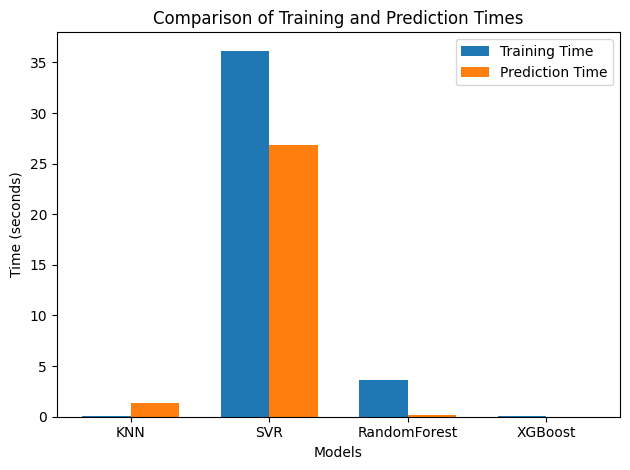

In [ ]:
import matplotlib.pyplot as plt

# 演算法的名稱
model_names = list(models_performance.keys())

# 訓練時間和預測時間
training_times = [models_performance[model]['Training Time'] for model in model_names]
prediction_times = [models_performance[model]['Prediction Time'] for model in model_names]

# 設定條形圖寬度
bar_width = 0.35

# 生成索引
index = range(len(model_names))

# 訓練時間條形圖
plt.bar(index, training_times, bar_width, label='Training Time')

# 預測時間條形圖，將條形圖向右移動一個寬度
plt.bar([i + bar_width for i in index], prediction_times, bar_width, label='Prediction Time')

# 添加標籤和標題
plt.xlabel('Models')
plt.ylabel('Time (seconds)')
plt.title('Comparison of Training and Prediction Times')
plt.xticks([i + bar_width / 2 for i in index], model_names)

# 添加圖例
plt.legend()

# 顯示圖表
plt.tight_layout()
plt.show()


Generate comparison charts for various metrics.

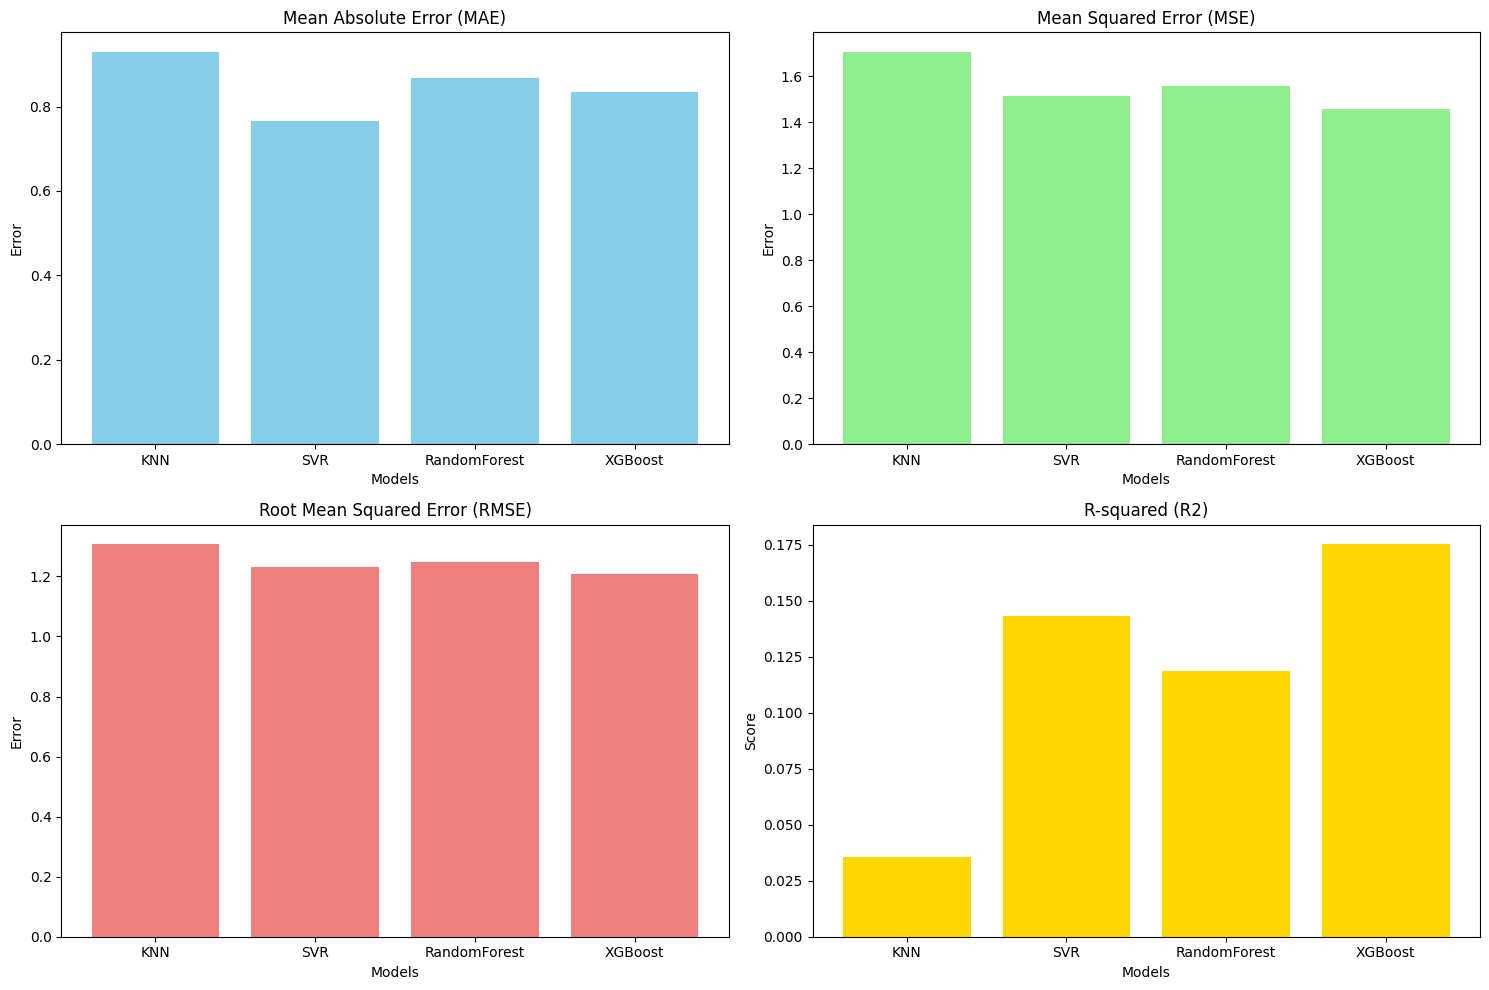

In [ ]:
# 繪製比較指標的圖表
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# MAE 比較
axs[0, 0].bar(model_names, [models_performance[model]['MAE'] for model in model_names], color='skyblue')
axs[0, 0].set_title('Mean Absolute Error (MAE)')
axs[0, 0].set_ylabel('Error')

# MSE 比較
axs[0, 1].bar(model_names, [models_performance[model]['MSE'] for model in model_names], color='lightgreen')
axs[0, 1].set_title('Mean Squared Error (MSE)')
axs[0, 1].set_ylabel('Error')

# RMSE 比較
axs[1, 0].bar(model_names, [models_performance[model]['RMSE'] for model in model_names], color='lightcoral')
axs[1, 0].set_title('Root Mean Squared Error (RMSE)')
axs[1, 0].set_ylabel('Error')

# R2 比較
axs[1, 1].bar(model_names, [models_performance[model]['R2'] for model in model_names], color='gold')
axs[1, 1].set_title('R-squared (R2)')
axs[1, 1].set_ylabel('Score')

# 設定 x 軸標籤
for ax in axs.flat:
    ax.set_xlabel('Models')

# 調整每個 subplot 間距
plt.tight_layout()

# 顯示圖表
plt.show()
